In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras import optimizers
import pandas as pd
import itertools
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
Train_Path = '../input/fruits-360/fruits-360/Training/'
Test_Path = '../input/fruits-360/fruits-360/Test/'

In [3]:
X_train = []
Y_train = []
X_test = []
Y_test = []

train_dir = []
test_dir = []

for labels in os.listdir(Train_Path):
    path_1 = os.path.join(Train_Path, labels)
    for images in os.listdir(path_1):
        path_2 = os.path.join(path_1, images)
        img = cv2.imread(path_2)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
        X_train.append(img)
        Y_train.append(labels)
        
for labels in os.listdir(Test_Path):
    path_1 = os.path.join(Test_Path, labels)
    for images in os.listdir(path_1):
        path_2 = os.path.join(path_1, images)
        img = cv2.imread(path_2)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
        X_test.append(img)
        Y_test.append(labels)

(67692, 32, 32, 3)
(67692,)
(22688, 32, 32, 3)
(22688,)


67692
67692
22688
22688


['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Corn' 'Corn Husk'
 'Cucumber Ripe' 'Cucumber Ripe 2' 'Dates' 'Eggplant' 'Fig' 'Ginger Root'
 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White' 'Grape White 2'
 'Grape White 3' 'Grape White 4' 'Grapefruit Pink' 'Grapefruit White'
 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi' 'Kohlrabi' 'Kumquats'
 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine' 'Mango' 'Mango Red'


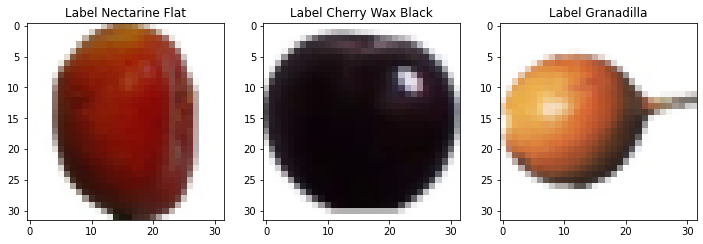

In [4]:
plt.figure(figsize=(12,12))

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print('\n')
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

plt.subplot(1,3,1)
plt.imshow(X_train[0])
plt.title('Label'+ ' ' + str(Y_train[0]))
plt.subplot(1,3,2)
plt.imshow(X_train[5000])
plt.title('Label'+ ' ' + str(Y_train[5000]))
plt.subplot(1,3,3)
plt.imshow(X_test[1000])
plt.title('Label'+ ' ' + str(Y_test[1000]))

print('\n')
print(str(np.unique(Y_train)) + ' \n ' + 'Number of classes' + ' ' + str(len(np.unique(Y_train))))


In [5]:
X_train = X_train / 255
X_test = X_test / 255

laben = LabelEncoder()
Y_train = laben.fit_transform(Y_train) # Converts the categorical label to (0,1)
Y_train = to_categorical(Y_train,131) # Converts that (0,1) in array form

Y_test = laben.fit_transform(Y_test) 
Y_test = to_categorical(Y_test,131) 

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(67692, 32, 32, 3)
(22688, 32, 32, 3)
(67692, 131)
(22688, 131)


In [6]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same',activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))	
model.add(Dense(131, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0

In [7]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [8]:
checkpoint = ModelCheckpoint('/kaggle/working/model.h5',
                             monitor = 'val_loss',
                             mode = 'min',
                             save_best_only=True,
                             verbose = 1
                            )

callbacks = [checkpoint]

In [9]:
history = model.fit(X_train, Y_train,
                   epochs = 50,
                   validation_data = (X_test, Y_test),
                   batch_size=8,
                  callbacks = callbacks)
                   
model.save('/kaggle/working/model_1.h5')

Epoch 1/50
8462/8462 [==============================] - ETA: 0s - loss: 1.5458 - accuracy: 0.5920
Epoch 00001: val_loss improved from inf to 0.47672, saving model to /kaggle/working/model.h5
8462/8462 [==============================] - 43s 5ms/step - loss: 1.5458 - accuracy: 0.5920 - val_loss: 0.4767 - val_accuracy: 0.8818
Epoch 2/50
8451/8462 [============================>.] - ETA: 0s - loss: 0.2588 - accuracy: 0.9158
Epoch 00002: val_loss improved from 0.47672 to 0.29640, saving model to /kaggle/working/model.h5
8462/8462 [==============================] - 43s 5ms/step - loss: 0.2587 - accuracy: 0.9158 - val_loss: 0.2964 - val_accuracy: 0.9289
Epoch 3/50
8457/8462 [============================>.] - ETA: 0s - loss: 0.1315 - accuracy: 0.9580
Epoch 00003: val_loss did not improve from 0.29640
8462/8462 [==============================] - 43s 5ms/step - loss: 0.1315 - accuracy: 0.9580 - val_loss: 0.3466 - val_accuracy: 0.9471
Epoch 4/50
8455/8462 [============================>.] - ETA: 0s

8455/8462 [============================>.] - ETA: 0s - loss: 0.0809 - accuracy: 0.9868
Epoch 00028: val_loss did not improve from 0.15472
8462/8462 [==============================] - 42s 5ms/step - loss: 0.0808 - accuracy: 0.9868 - val_loss: 0.2215 - val_accuracy: 0.9755
Epoch 29/50
8455/8462 [============================>.] - ETA: 0s - loss: 0.0732 - accuracy: 0.9870
Epoch 00029: val_loss did not improve from 0.15472
8462/8462 [==============================] - 43s 5ms/step - loss: 0.0733 - accuracy: 0.9870 - val_loss: 0.1799 - val_accuracy: 0.9745
Epoch 30/50
8459/8462 [============================>.] - ETA: 0s - loss: 0.0777 - accuracy: 0.9871
Epoch 00030: val_loss did not improve from 0.15472
8462/8462 [==============================] - 43s 5ms/step - loss: 0.0776 - accuracy: 0.9871 - val_loss: 0.1889 - val_accuracy: 0.9742
Epoch 31/50
8456/8462 [============================>.] - ETA: 0s - loss: 0.0777 - accuracy: 0.9870
Epoch 00031: val_loss did not improve from 0.15472
8462/8462 

In [10]:
Score = model.evaluate(X_test,Y_test)
print(' Test Accuracy ', Score[1])

709/709 [==============================] - 2s 3ms/step - loss: 0.3637 - accuracy: 0.9679
 Test Accuracy  0.967868447303772


In [11]:
y_test_ = np.argmax(Y_test, axis=1)
y_pred_ = model.predict_classes(X_test)

In [16]:
print('Classification Report \n')
print(classification_report(y_test_, y_pred_))

Classification Report 

              precision    recall  f1-score   support

           0       0.96      0.70      0.81       164
           1       0.95      1.00      0.98       148
           2       0.94      1.00      0.97       160
           3       0.93      1.00      0.96       164
           4       0.79      1.00      0.88       161
           5       1.00      0.93      0.97       164
           6       0.82      1.00      0.90       152
           7       1.00      0.63      0.78       164
           8       0.95      0.98      0.96       164
           9       1.00      0.92      0.96       144
          10       1.00      1.00      1.00       166
          11       1.00      1.00      1.00       164
          12       1.00      1.00      1.00       219
          13       1.00      1.00      1.00       164
          14       1.00      1.00      1.00       143
          15       1.00      1.00      1.00       166
          16       1.00      0.75      0.86       166
   

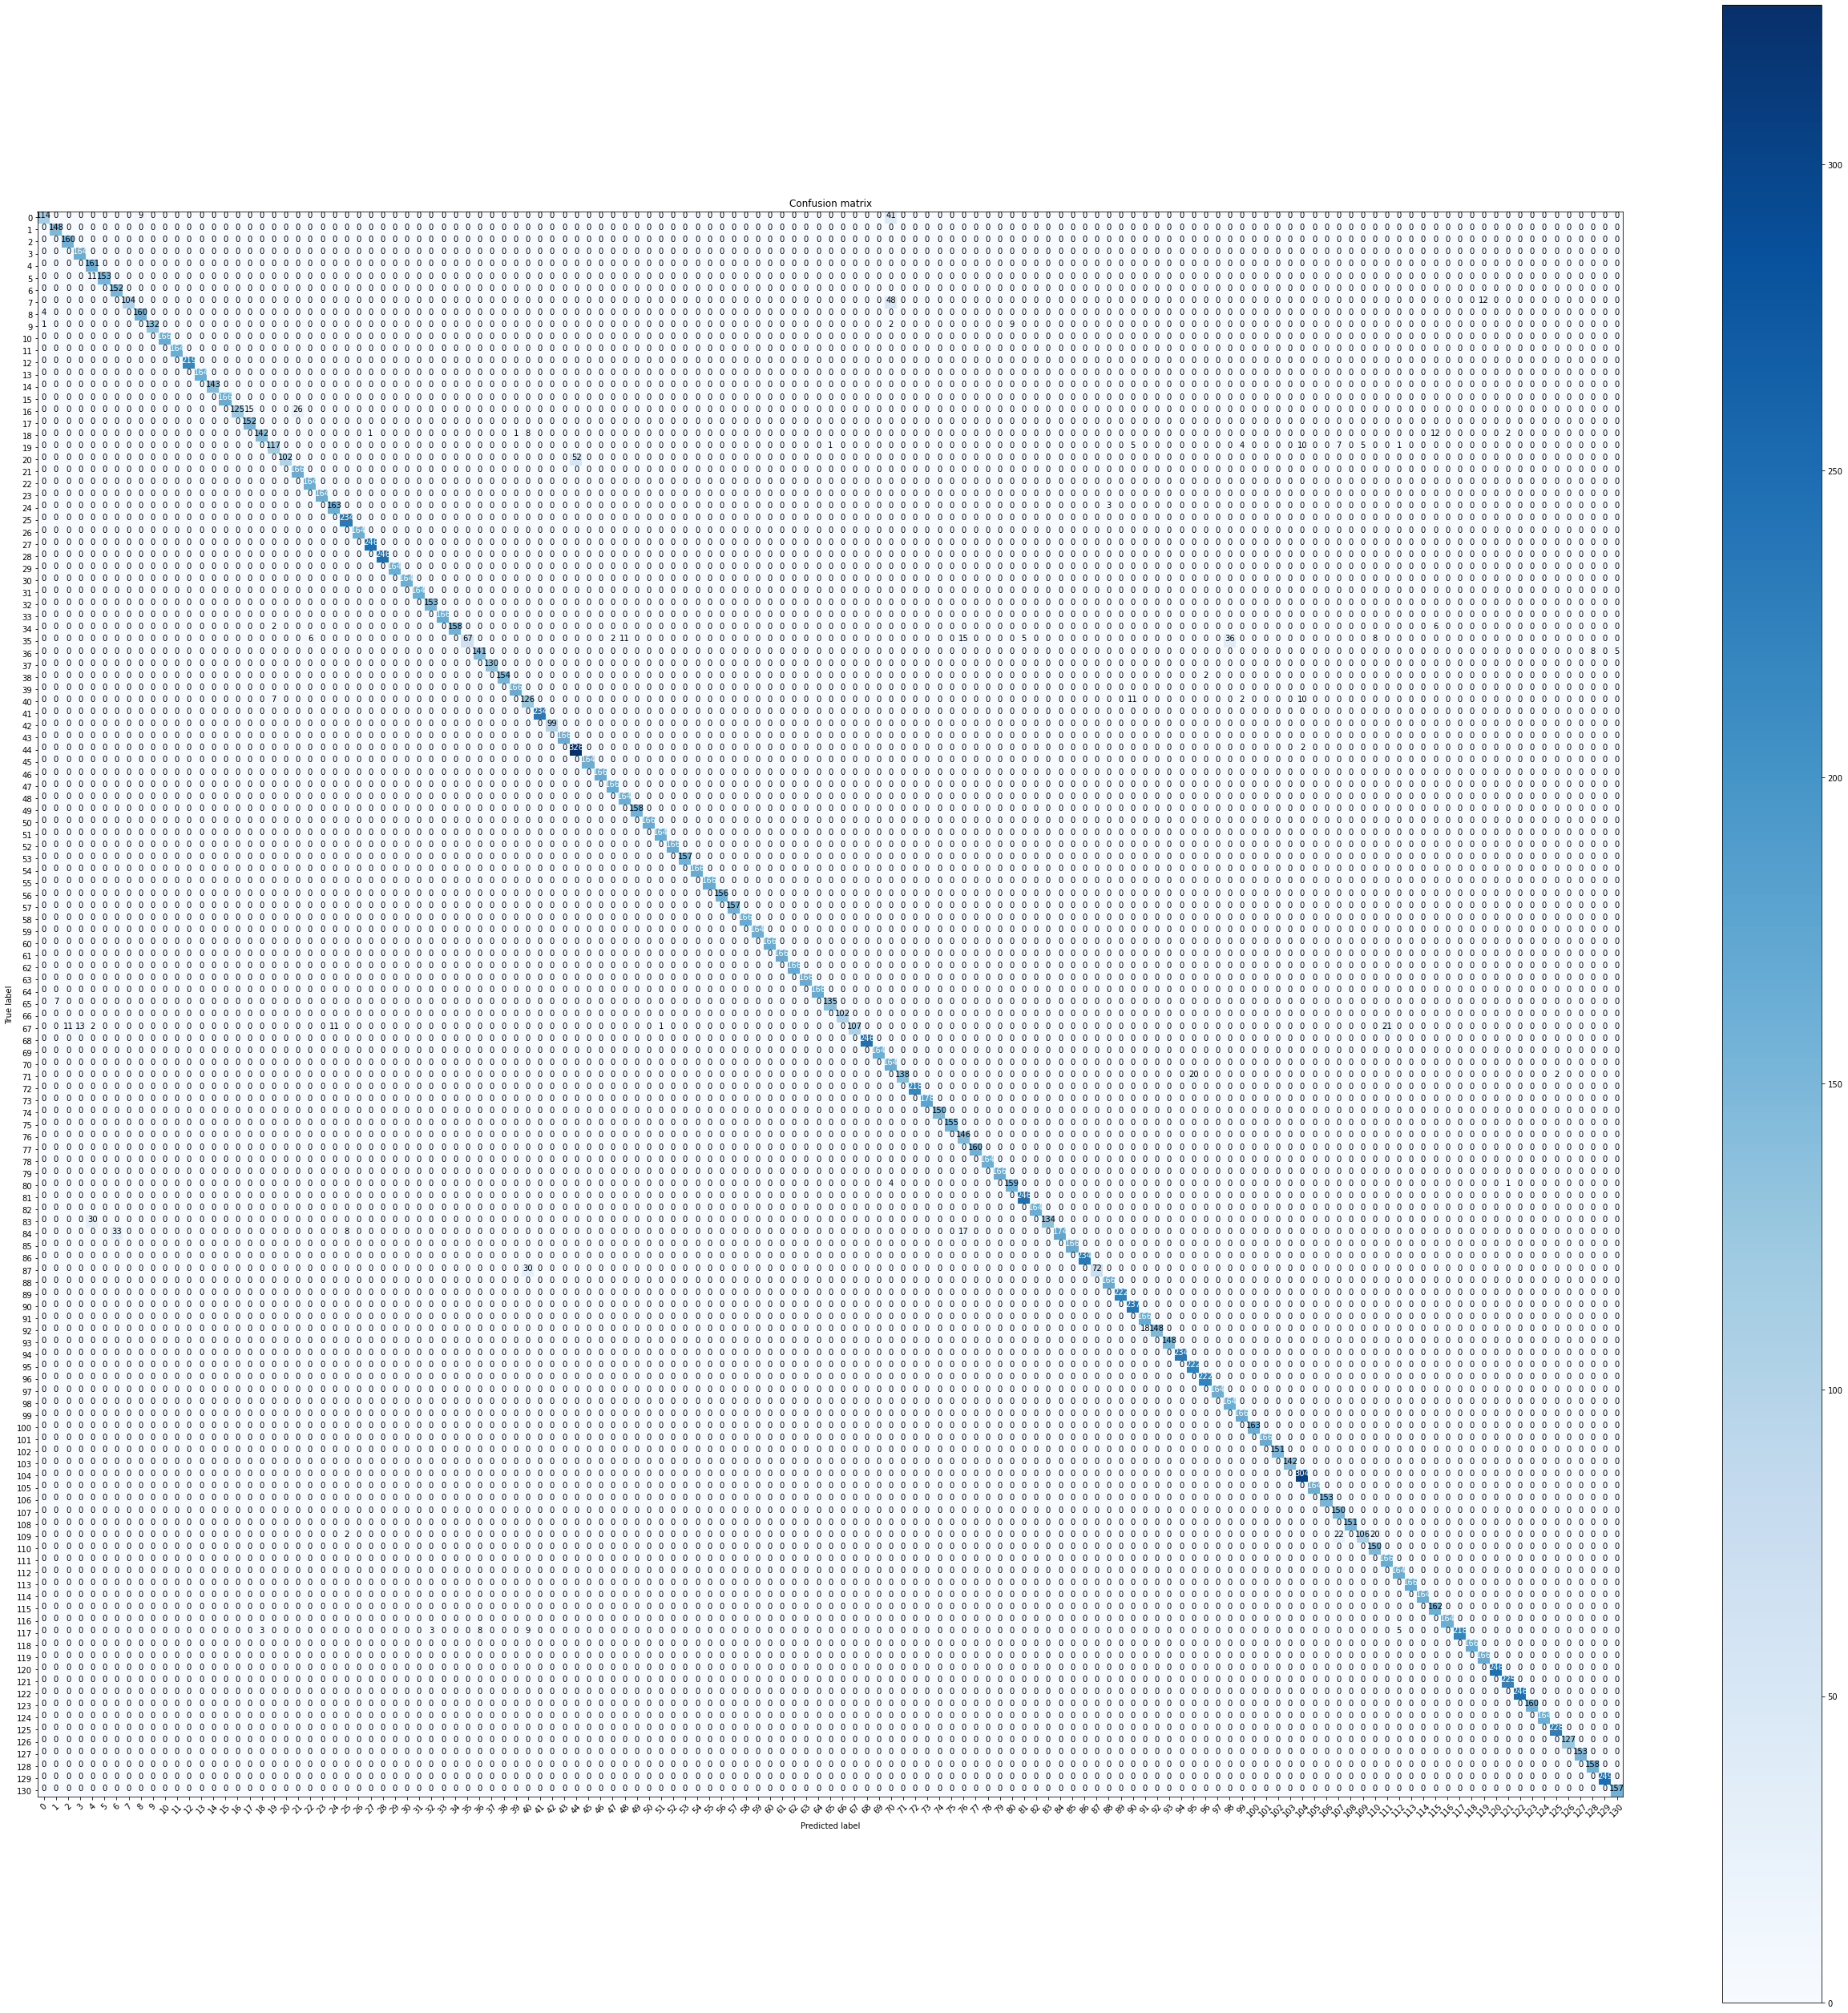

In [19]:
plt.figure(figsize=(45,45))

classes = 131
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion_mtx = confusion_matrix(y_test_, y_pred_) 
plot_confusion_matrix(confusion_mtx, classes = range(131)) 
